In [1]:
#import libs
import pickle
import tensorflow as tf
import os
from tensorflow.keras.callbacks import TensorBoard
import datetime
import matplotlib.pyplot as plt

In [2]:
#load data
x=pickle.load(open('x.pkl','rb')) #read =r binary= b 
y=pickle.load(open('y.pkl','rb'))


In [3]:
#8-bit numeralize
x= x/255
x.shape

(24912, 100, 100, 3)

In [4]:
#CNN model libs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense


In [5]:
#Custom Model Function 
def Create_Model():
    model=Sequential([
        Conv2D(64,(3,3),activation='relu',input_shape=(100,100,3)), 
        MaxPooling2D(2,2),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(30,activation='relu',input_shape=x.shape[1:]),
        Dense(2, activation='softmax')
    ])
    history=model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
    return model
#input shape colored image weight and height is 100pixel activation is relU 3 layer cnn model 

In [6]:
#tensorboard visualization for analyze
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [7]:
#save trained model setup 
model=Create_Model()
checkpoint_path="training/cp2.ckpt"
checkpoint_dir=os.path.dirname(checkpoint_path)
cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1,period=5)




In [8]:

model.fit(x,y,epochs=5,validation_split=0.1,callbacks=[cp_callback,tensorboard_callback])

Epoch 1/5


c:\program files\python38\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


701/701 [==============================] - 21s 17ms/step - loss: 0.6238 - accuracy: 0.6360 - val_loss: 0.5440 - val_accuracy: 0.7203
Epoch 2/5
701/701 [==============================] - 11s 15ms/step - loss: 0.4965 - accuracy: 0.7588 - val_loss: 0.4907 - val_accuracy: 0.7576
Epoch 3/5
701/701 [==============================] - 11s 15ms/step - loss: 0.4190 - accuracy: 0.8091 - val_loss: 0.4332 - val_accuracy: 0.7925
Epoch 4/5
701/701 [==============================] - 11s 15ms/step - loss: 0.3730 - accuracy: 0.8327 - val_loss: 0.3826 - val_accuracy: 0.8274
Epoch 5/5
701/701 [==============================] - 11s 15ms/step - loss: 0.3266 - accuracy: 0.8572 - val_loss: 0.3669 - val_accuracy: 0.8411

Epoch 00005: saving model to training\cp2.ckpt


In [9]:
#load model
model.load_weights(checkpoint_path)

In [38]:
def imagepredict(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    plt.imshow(img)
    plt.show()
    test_image=image.img_to_array(img)
    image_batch=np.expand_dims(test_image,axis=0)
    result = model.predict(image_batch)
    return result

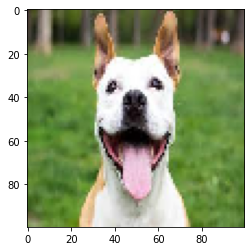

array([[0., 1.]], dtype=float32)

In [39]:
dog1="kope.jpg"
imagepredict(dog1)

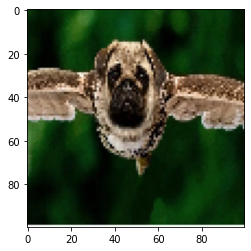

array([[0., 1.]], dtype=float32)

In [42]:
dog2="kope1.jpg"
imagepredict(dog2)

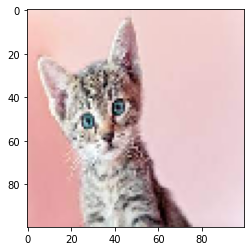

array([[1., 0.]], dtype=float32)

In [47]:
cat="cat1.jpg"
imagepredict(cat)